# **1. Khai báo các thư viện cần sử dụng:**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# **2. Kết nối với Google Drive để đọc và lưu dữ liệu:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **3. Khai báo đường dẫn thư mục chứa ảnh dữ liệu và lọc lại dữ liệu:**

In [ ]:
picture_size = 200
folder_path = "/content/drive/MyDrive/AI/Motorbikes/dataset/"

In [ ]:
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import cv2
folder_path_train = "/content/drive/MyDrive/AI/Motorbikes/dataset/train/"
folder_path_validation = "/content/drive/MyDrive/AI/Motorbikes/dataset/validation/"
x_train = np.zeros((3093,200,200), dtype=np.float32)
x_val = np.zeros((356,200,200), dtype=np.float32)
y_train = []
y_val = []
count = 0
c = 0
for i in os.listdir(folder_path_train):
  path = folder_path_train + str(i)+"/"
  for j in os.listdir(path):
      path_img = path+j
      print(path_img)
      img = cv2.imread(path_img,0)
      img = cv2.resize(img,(200,200))
      x_train[count][::][::] = img/255.0
      y_train.append(c)
      count+=1
  c+=1
c = 0
count = 0
for i in os.listdir(folder_path_validation):
  path = folder_path_validation + str(i)+"/"
  for j in os.listdir(path):
      path_img = path+j
      print(path_img)
      img = cv2.imread(path_img,0)
      img = cv2.resize(img,(200,200))
      x_val[count][::][::] = img/255.0
      y_val.append(c)
      count+=1
  c+=1

/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_2.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_1.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_3.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_5.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_4.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_8.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_7.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_6.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_9.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_10.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_11.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_15.jpg
/content/drive/MyDrive/AI/Motorbikes/dataset/train/Yamaha_YSR_80/Image_17

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

3093
3093
356
356


In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 17)
y_val = np_utils.to_categorical(y_val, 17)

# **4. Gán nhãn dữ liệu:**

In [ ]:
for i in os.listdir(folder_path_train):
  print(i)
for i in os.listdir(folder_path_validation):
  print(i)

Yamaha_YSR_80
Yamaha_Exciter
Suzuki_Dirt_Bikes_125Cc
Yamaha_Bolt_XVS950
Suzuki_DRZ400E
Suzuki_Burgman_400_Scooter
Yamaha_MT_Bike
Suzuki_Sv650x
SH_Mode_125
Yamaha_R_125
Honda_XL_75
Honda_Monkey_50Cc_Bike
Honda_CB_750_Four
Honda_Air_Blade_125
Honda_Dream
Honda_Silver_Wing_600
Honda_Wave_Alpha
Suzuki_Burgman_400_Scooter
Suzuki_DRZ400E
Yamaha_Exciter
Yamaha_R_125
Yamaha_MT_Bike
Suzuki_Sv650x
SH_Mode_125
Suzuki_Dirt_Bikes_125Cc
Yamaha_Bolt_XVS950
Yamaha_YSR_80
Honda_XL_75
Honda_Monkey_50Cc_Bike
Honda_CB_750_Four
Honda_Air_Blade_125
Honda_Dream
Honda_Silver_Wing_600
Honda_Wave_Alpha


In [ ]:
label=['Yamaha_YSR_80','Yamaha_Exciter','Suzuki_Dirt_Bikes_125Cc','Yamaha_Bolt_XVS950','Suzuki_DRZ400E','Suzuki_Burgman_400_Scooter','Yamaha_MT_Bike','Suzuki_Sv650x','SH_Mode_125','Yamaha_R_125','Honda_XL_75','Honda_Monkey_50Cc_Bike','Honda_CB_750_Four','Honda_Air_Blade_125','Honda_Dream','Honda_Silver_Wing_600','Honda_Wave_Alpha']

# **5. Hiện thị hình ảnh:**

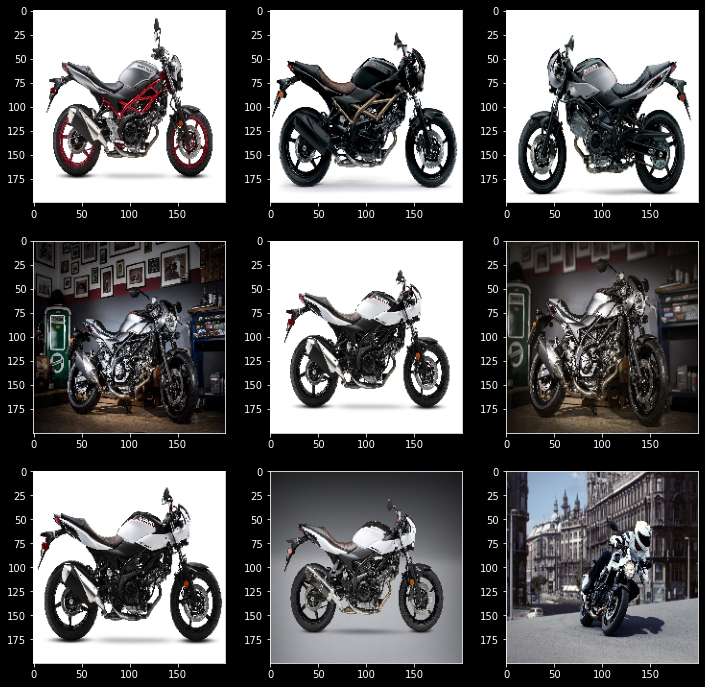

In [ ]:
expression = 'Suzuki_Sv650x'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# **6. Tiền xử lý dữ liệu ảnh với ImageDataGenerator:**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

# **7. Đọc dữ liệu train và validation:**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    folder_path_train,                                         
    target_size=(picture_size, picture_size),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    folder_path_validation,
    target_size=(picture_size, picture_size),               
    class_mode='categorical')

Found 3091 images belonging to 17 classes.
Found 355 images belonging to 17 classes.


# **8. Xây dựng mô hình:**

In [ ]:
no_of_classes = 17

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (200,200,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.5))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.5))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 3nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     2

# **9. Thiết lập các tham số để huấn luyện mô hình:**

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

# **10. Huấn luyện mô hình:**

In [ ]:
opt = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, batch_size = 10, validation_data = (x_val, y_val))

Epoch 1/100
310/310 [==============================] - 39s 80ms/step - loss: 3.8480 - accuracy: 0.0873 - val_loss: 3.4425 - val_accuracy: 0.0534
Epoch 2/100
310/310 [==============================] - 24s 77ms/step - loss: 3.3122 - accuracy: 0.0947 - val_loss: 3.9113 - val_accuracy: 0.0590
Epoch 3/100
310/310 [==============================] - 24s 78ms/step - loss: 2.9513 - accuracy: 0.1274 - val_loss: 3.4987 - val_accuracy: 0.0758
Epoch 4/100
310/310 [==============================] - 25s 80ms/step - loss: 2.7779 - accuracy: 0.1384 - val_loss: 3.4658 - val_accuracy: 0.0056
Epoch 5/100
310/310 [==============================] - 25s 80ms/step - loss: 2.6373 - accuracy: 0.1707 - val_loss: 3.3025 - val_accuracy: 0.0365
Epoch 6/100
310/310 [==============================] - 25s 79ms/step - loss: 2.5737 - accuracy: 0.1878 - val_loss: 3.3118 - val_accuracy: 0.0730
Epoch 7/100
310/310 [==============================] - 25s 79ms/step - loss: 2.5282 - accuracy: 0.2076 - val_loss: 3.3572 - val_ac

# **11. Vẽ đồ thị của Accuracy và Loss:**

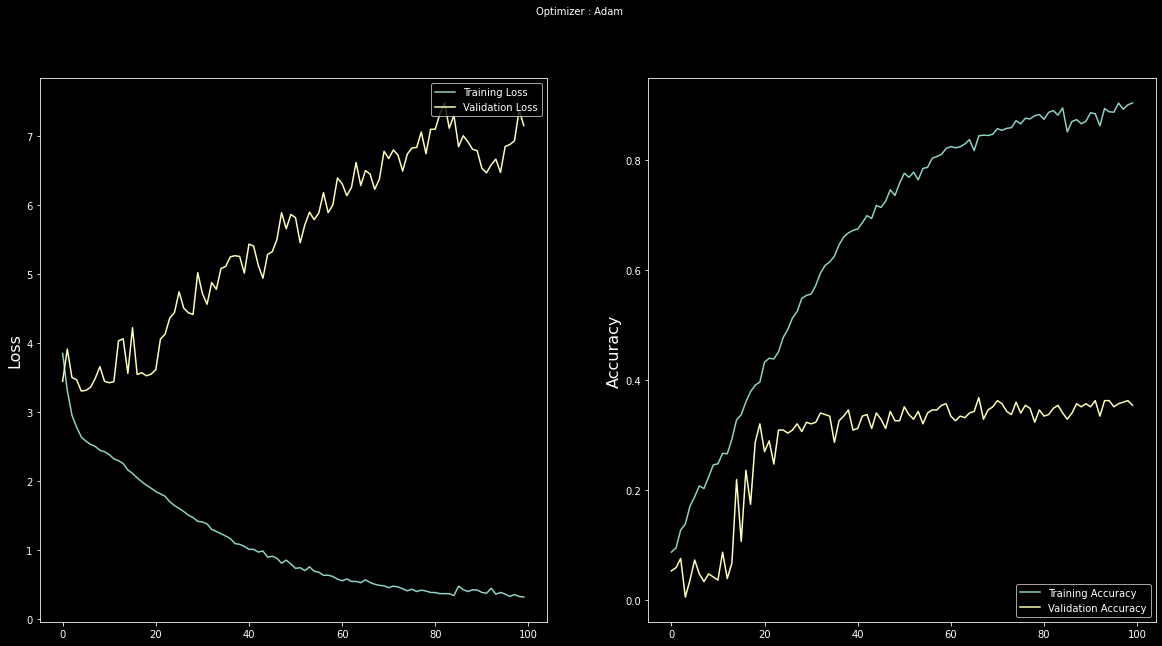

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI/Model.h5')

# **12. Sử dụng mô hình:**

Saving 6.jpg to 6.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  SH_Mode_125


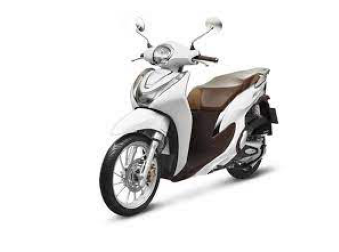

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #Dự đoán ảnh
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,color_mode = 'grayscale',target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])